In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Load the dataset
data = pd.read_csv('Reviews(13).csv')

In [6]:

## Correcting the spelling of one misspelled label
data['Label'] = data['Label'].str.replace('negative', 'Negative')
data['Label'] = data['Label'].str.replace('neutral', 'Neutral')
data['Label'] = data['Label'].str.replace('positive', 'Positive')
data['Label'] = data['Label'].str.replace('Netural', 'Neutral')
data['Label'] = data['Label'].str.replace(' Neutral', 'Neutral')

data['Label'].unique()

data['Label'].value_counts()

Positive    11730
Negative     9109
Neutral      3596
Name: Label, dtype: int64

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['Label'], test_size=0.2, random_state=42)


In [8]:
# Preprocess the training and testing data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
# Get the predicted labels for the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification report:\n{report}')


Accuracy: 0.9169224473091876
Classification report:
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.91      1822
     Neutral       0.87      0.92      0.90       683
    Positive       0.95      0.92      0.93      2382

    accuracy                           0.92      4887
   macro avg       0.91      0.92      0.91      4887
weighted avg       0.92      0.92      0.92      4887



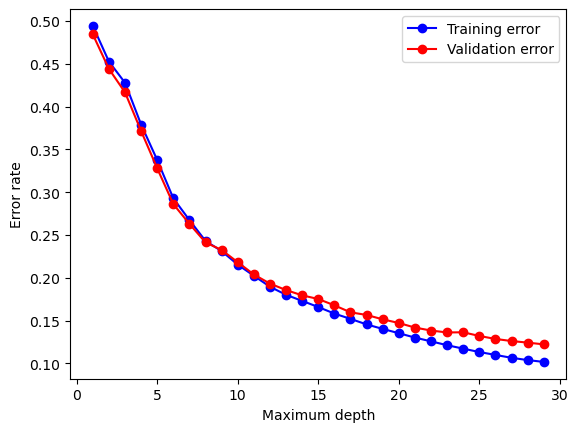

In [13]:
# Plot the accuracy and loss curves
train_errors, val_errors = [], []
for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    val_errors.append(1 - accuracy_score(y_test, y_val_pred))

plt.plot(range(1, 30), train_errors, 'bo-', label='Training error')
plt.plot(range(1, 30), val_errors, 'ro-', label='Validation error')
plt.xlabel('Maximum depth')
plt.ylabel('Error rate')
plt.legend()
plt.show()


In [15]:
# Get predictions for sample reviews
reviews = [
    'Doctor na achi tarah dekha!',
    'I did not like the doctor.',
    'The appointment was good but staff na acha treat nahi kiya'
]
X_sample = vectorizer.transform(reviews)
y_sample_pred = model.predict(X_sample)
print(f'Sample reviews predicted sentiment: {y_sample_pred}')

Sample reviews predicted sentiment: ['Negative' 'Negative' 'Positive']
